## Traffic Sign Recognition

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [3]:
data_dir = '/content/drive/MyDrive/AI Bootcamp Projects/Final Project_Salwa Ziada Salsabiila/GTSRB Dataset Unzip/'
train_path = '/content/drive/MyDrive/AI Bootcamp Projects/Final Project_Salwa Ziada Salsabiila/GTSRB Dataset Unzip/Train'
test_path = '/content/drive/MyDrive/AI Bootcamp Projects/Final Project_Salwa Ziada Salsabiila/GTSRB Dataset Unzip/Test'

# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [4]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [47]:
classes = { 0:'Batas kecepatan (20km/jam)',
            1:'Batas kecepatan (30km/jam)',
            2:'Batas kecepatan (50km/jam)',
            3:'Batas kecepatan (60km/jam)',
            4:'Batas kecepatan (70km/jam)',
            5:'Batas kecepatan (80km/jam)',
            6:'Batas Akhir kecepatan (80km/jam)',
            7:'Batas kecepatan (100km/jam)',
            8:'Batas kecepatan (120km/jam)',
            9:'Dilarang mendahului',
            10:'Dilarang mendahului untuk kendaraan di atas 3.5 ton',
            11:'Hak Putar di persimpangan',
            12:'Jalan Prioritas',
            13:'Berikan Jalan',
            14:'Berhenti',
            15:'Tidak ada kendaraan',
            16:'Kendaraan di atas 3.5 ton dilarang masuk',
            17:'Dilarang Masuk',
            18:'Peringatan Umum',
            19:'Belokan Tajam ke kiri',
            20:'Belokan Tajam ke kanan',
            21:'Belokan Ganda',
            22:'Jalan Berlubang',
            23:'Jalan Licin',
            24:'Jalan menyempit di sebelah kanan',
            25:'Pekerjaan Jalan',
            26:'Lampu Lalu Lintas',
            27:'Pejalan Kaki',
            28:'Penyebrangan Anak Sekolah',
            29:'Penyebrangan Sepeda',
            30:'Hati-hati Es/Salju',
            31:'Penyeberangan Hewan Liar',
            32:'Batas Akhir kecepatan + dilarang mendahului',
            33:'Belok Kanan Mendekat',
            34:'Belok Kiri Mendekat',
            35:'Hanya Lurus',
            36:'Lurus atau Belok Kanan',
            37:'Lurus atau Belok Kiri',
            38:'Belok Kanan',
            39:'Belok Kiri',
            40:'Wajib Putar',
            41:'larangan Akhir mendahului',
            42:'larangan Akhir mendahului untuk kendaraan di atas 3.5 ton' }


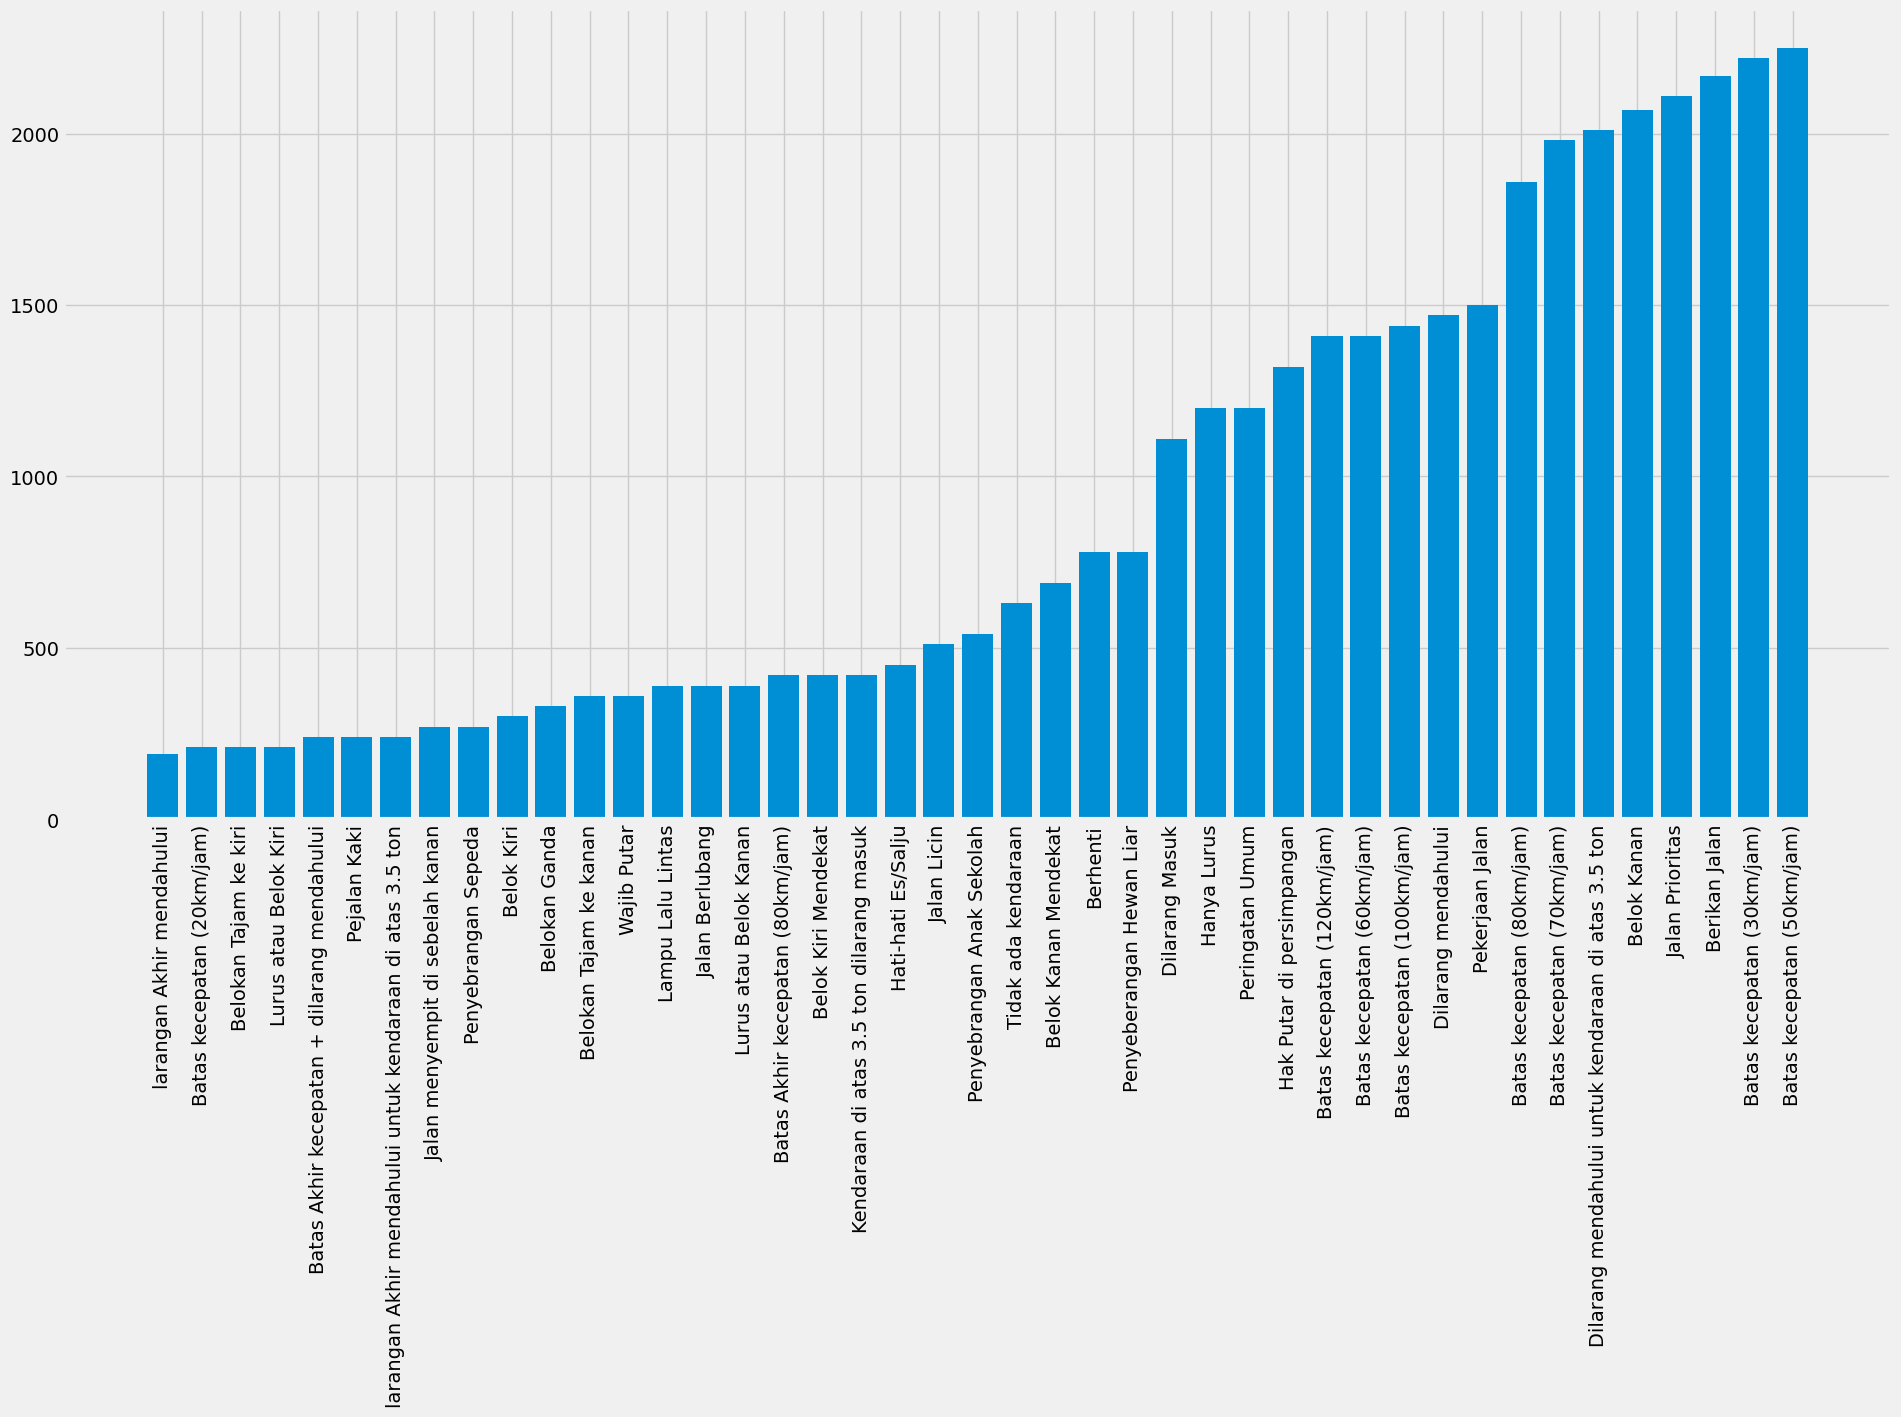

In [48]:
# Visualizing Dataset
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [6]:
# Collecting the training data
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(38964, 30, 30, 3) (38964,)


In [7]:
# Splitting the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27274, 30, 30, 3)
X_valid.shape (11690, 30, 30, 3)
y_train.shape (27274,)
y_valid.shape (11690,)


In [8]:
# one hot encoding the labels
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27274, 43)
(11690, 43)


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),


    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),

    keras.layers.Dense(43, activation='softmax')
])

In [12]:
lr = 0.001
epochs = 30

opt = Adam(learning_rate=lr)  # Specify learning_rate instead of lr
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])


In [13]:
# Augmenting the data and training the model
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/30
853/853 [==============================] - 99s 112ms/step - loss: 1.0411 - accuracy: 0.7145 - val_loss: 0.0967 - val_accuracy: 0.9693
Epoch 2/30
853/853 [==============================] - 95s 111ms/step - loss: 0.1848 - accuracy: 0.9439 - val_loss: 0.0309 - val_accuracy: 0.9903
Epoch 3/30
853/853 [==============================] - 97s 113ms/step - loss: 0.1051 - accuracy: 0.9668 - val_loss: 0.0612 - val_accuracy: 0.9797
Epoch 4/30
853/853 [==============================] - 96s 113ms/step - loss: 0.0935 - accuracy: 0.9709 - val_loss: 0.0161 - val_accuracy: 0.9958
Epoch 5/30
853/853 [==============================] - 92s 108ms/step - loss: 0.0820 - accuracy: 0.9736 - val_loss: 0.0527 - val_accuracy: 0.9847
Epoch 6/30
853/853 [==============================] - 94s 110ms/step - loss: 0.0640 - accuracy: 0.9805 - val_loss: 0.0184 - val_accuracy: 0.9942
Epoch 7/30
853/853 [==============================] - 92s 108ms/step - loss: 0.0650 - accuracy: 0.9802 - val_loss: 0.0235 - val_ac

In [14]:
# Save model
# Menyimpan model setelah pelatihan
model.save("traffic_sign_classifier.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
# Loading the test data and running the predictions
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255

# Make predictions
pred_probabilities = model.predict(X_test)
pred = np.argmax(pred_probabilities, axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

395/395 [==============================] - 8s 21ms/step
Test Data accuracy:  98.26603325415677


<Axes: >

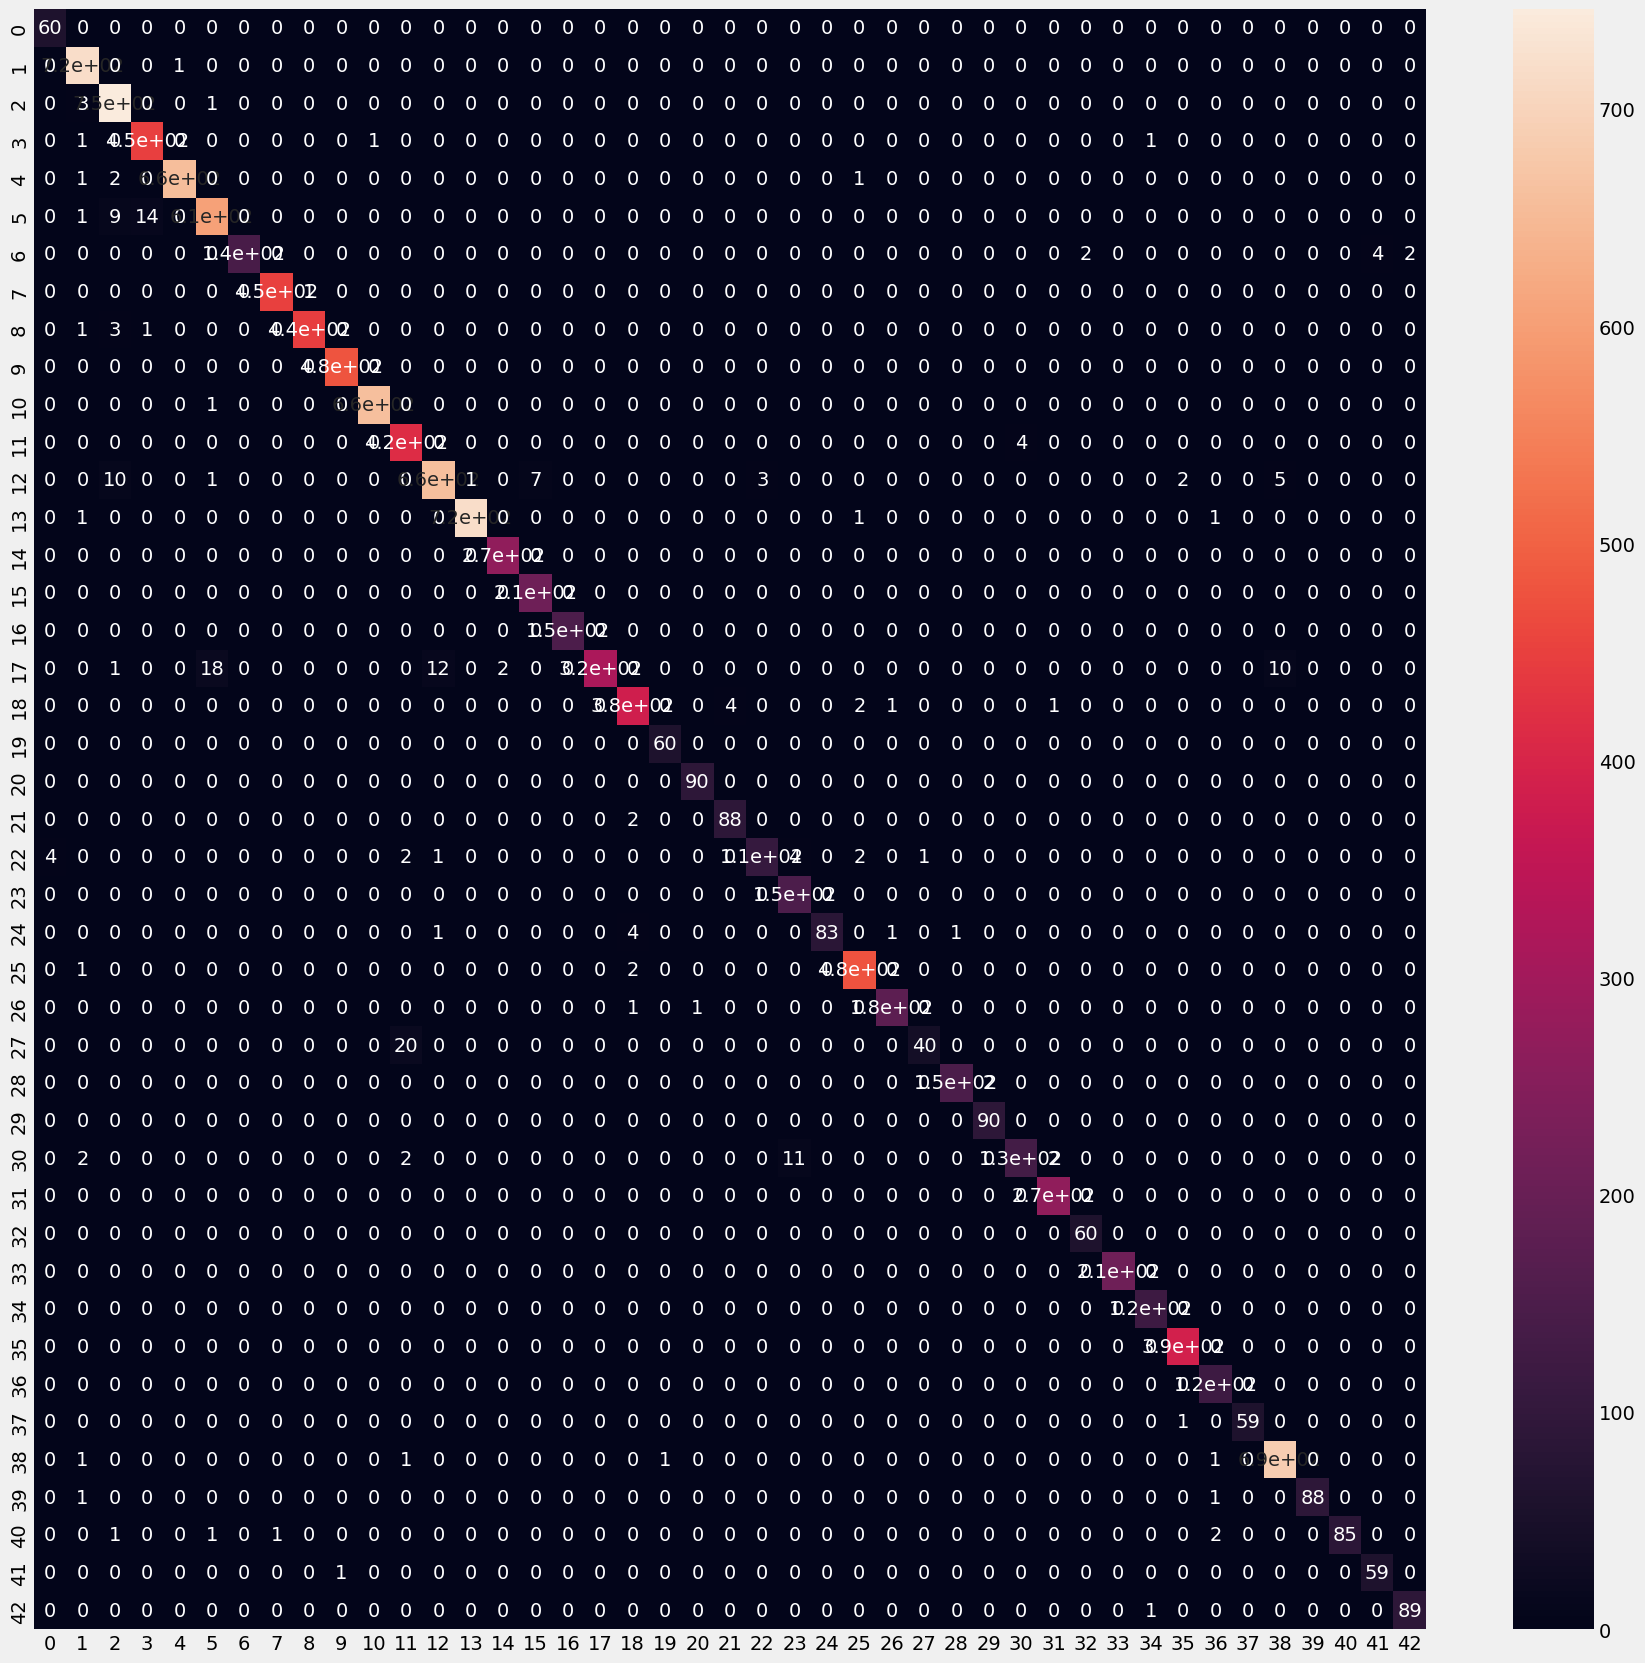

In [17]:
# Visualizing the confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

In [18]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(labels, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       0.98      1.00      0.99       720
           2       0.97      0.99      0.98       750
           3       0.97      0.99      0.98       450
           4       1.00      0.99      1.00       660
           5       0.96      0.96      0.96       630
           6       1.00      0.95      0.97       150
           7       1.00      1.00      1.00       450
           8       1.00      0.99      0.99       450
           9       1.00      1.00      1.00       480
          10       1.00      1.00      1.00       660
          11       0.94      0.99      0.97       420
          12       0.98      0.96      0.97       690
          13       1.00      1.00      1.00       720
          14       0.99      1.00      1.00       270
          15       0.97      1.00      0.98       210
          16       1.00      1.00      1.00       150
          17       1.00    

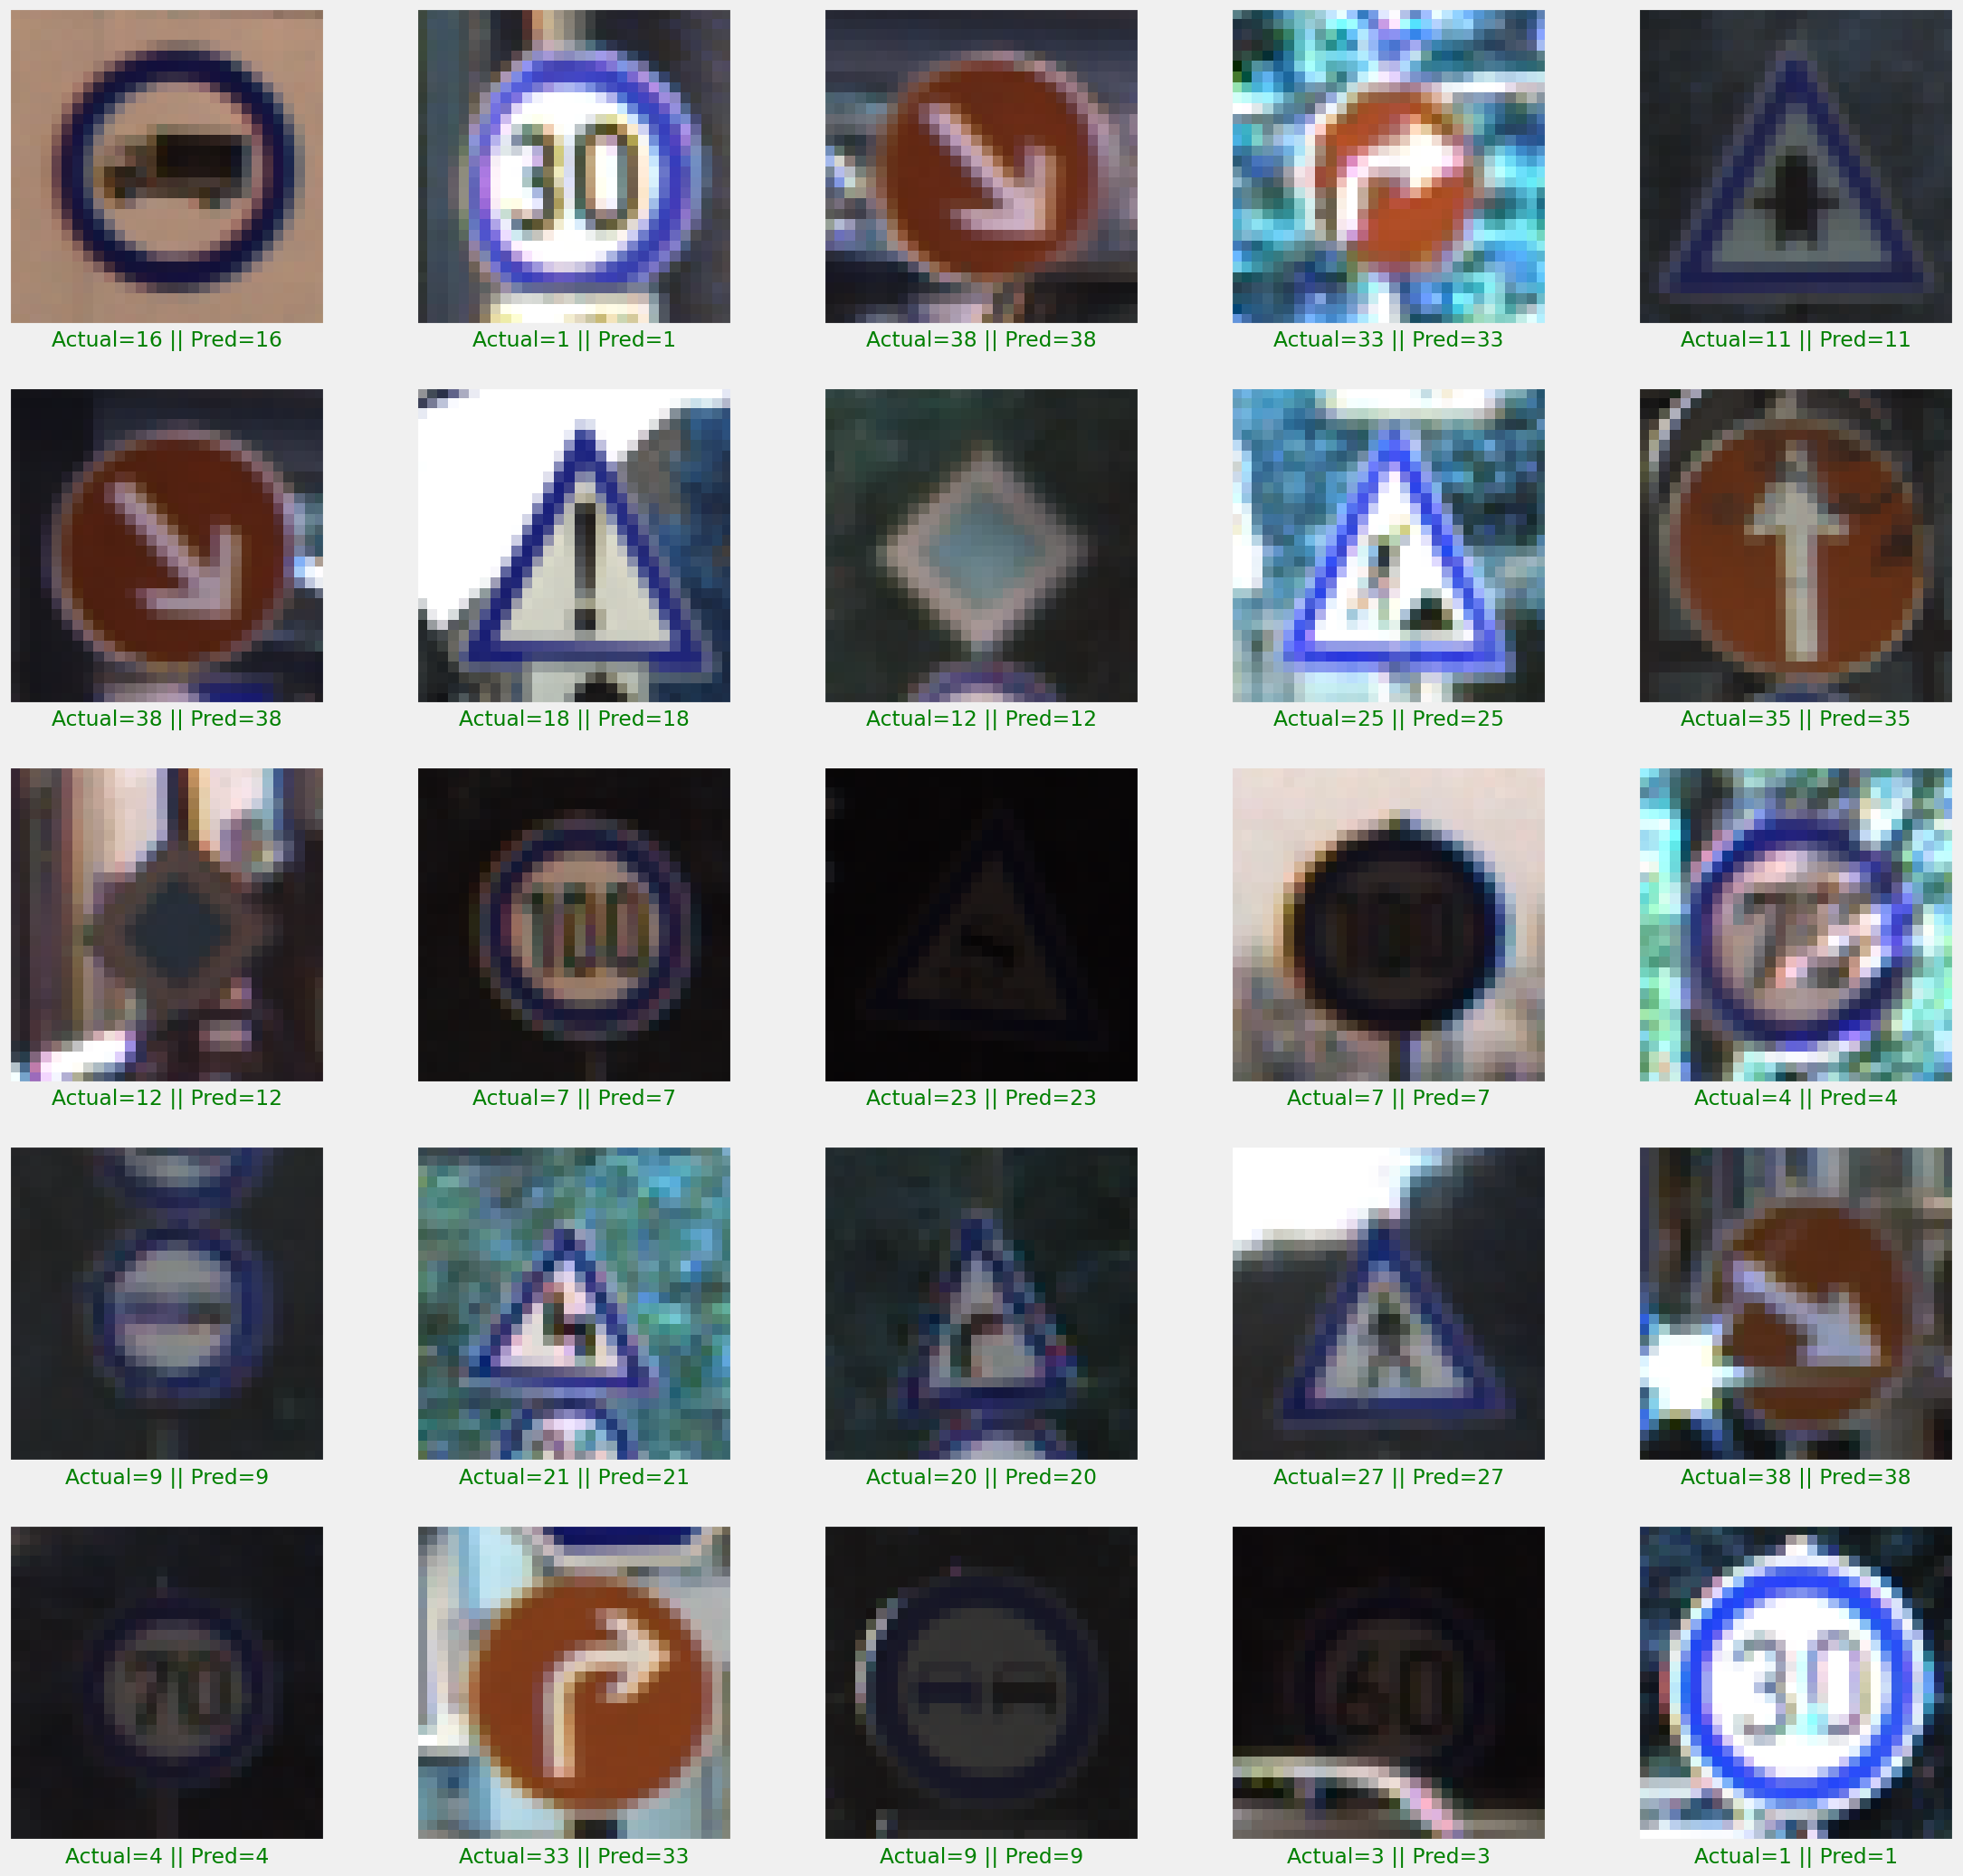

In [38]:
# Predictions on Test Data
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

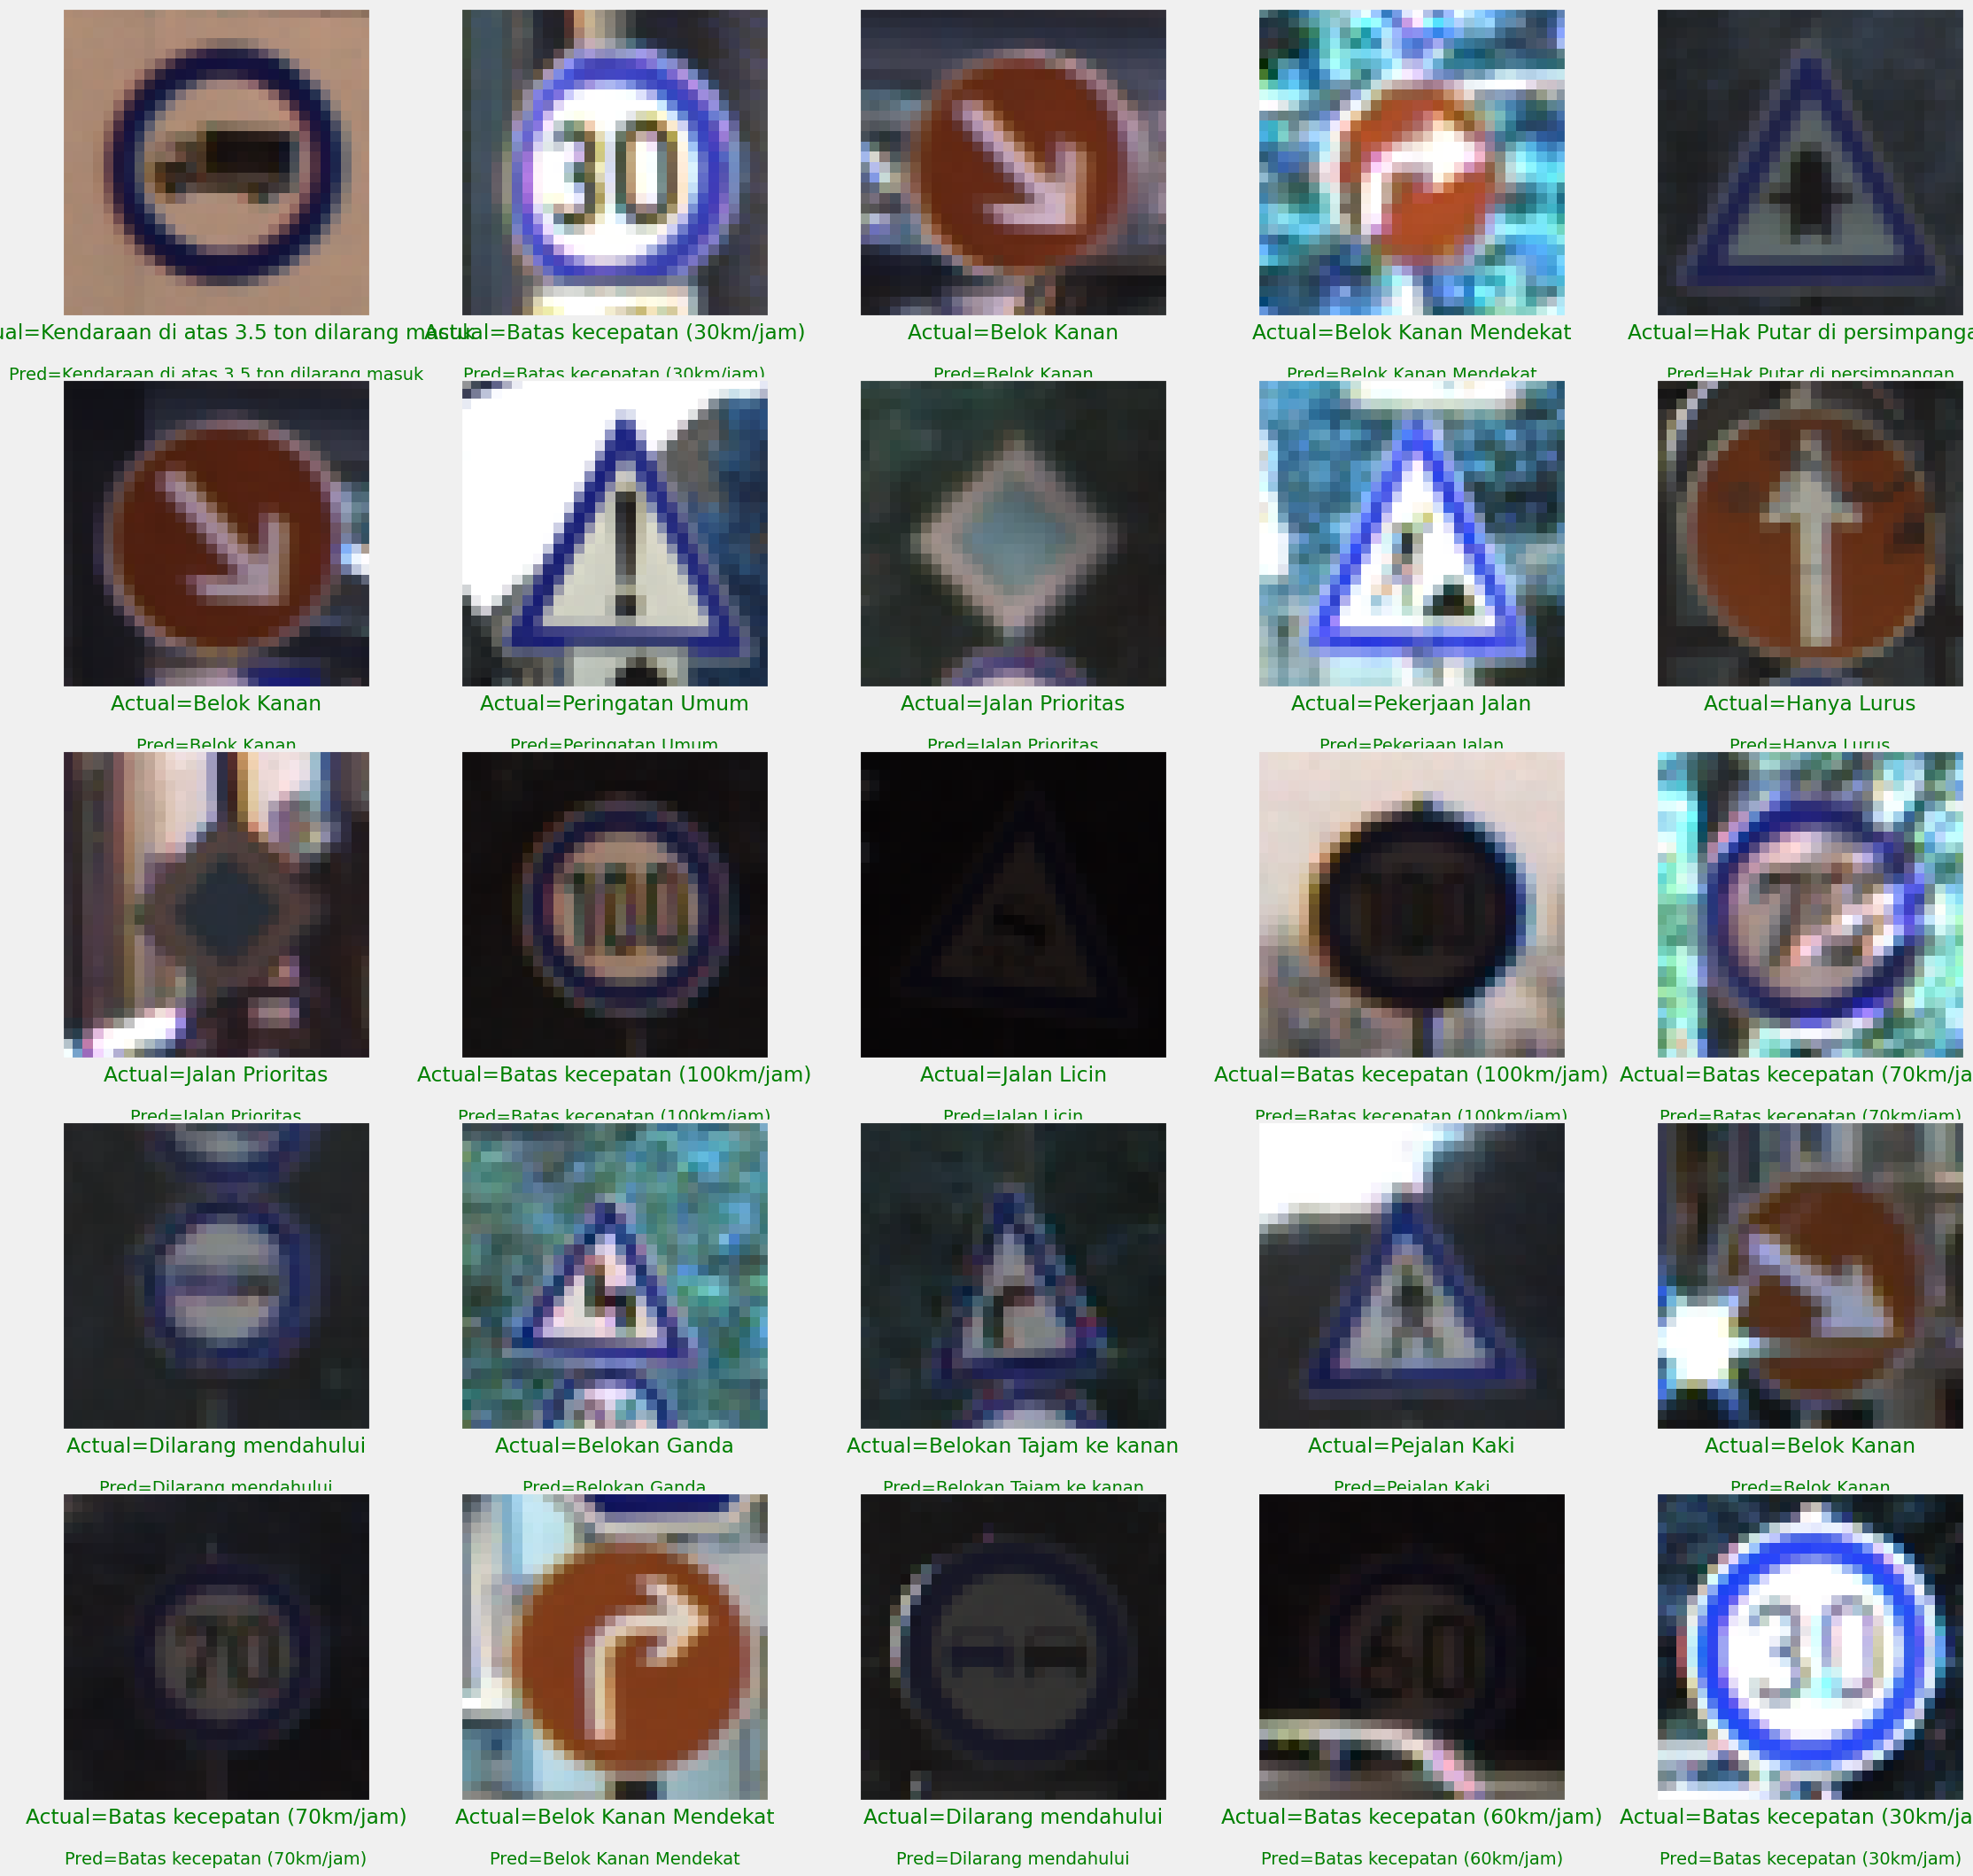

In [49]:
# Predictions on Test Data
plt.figure(figsize=(25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    prediction_label = classes[prediction]
    actual_label = classes[actual]
    plt.xlabel('Actual={}'.format(actual_label), color=col)  # Label actual
    plt.imshow(X_test[start_index + i])
    plt.text(0.5, -0.2, 'Pred={}'.format(prediction_label), color=col, transform=plt.gca().transAxes, ha="center")  # Label prediksi di bawah actual
plt.show()


In [22]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 10.0 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl si

In [44]:
import gradio as gr
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Lakukan kode Load Model untuk melakukan pengecekkan apa yang salah, karena berkali kali saat di run. output pada gradio hanya Error
# Load model
try:
    model = load_model("traffic_sign_classifier.h5")
except Exception as e:
    print("Error loading the model:", e)

# Dictionary untuk label kelas
classes = { 0:'Batas kecepatan (20km/jam)',
            1:'Batas kecepatan (30km/jam)',
            2:'Batas kecepatan (50km/jam)',
            3:'Batas kecepatan (60km/jam)',
            4:'Batas kecepatan (70km/jam)',
            5:'Batas kecepatan (80km/jam)',
            6:'Batas Akhir kecepatan (80km/jam)',
            7:'Batas kecepatan (100km/jam)',
            8:'Batas kecepatan (120km/jam)',
            9:'Dilarang mendahului',
            10:'Dilarang mendahului untuk kendaraan di atas 3.5 ton',
            11:'Hak Putar di persimpangan',
            12:'Jalan Prioritas',
            13:'Berikan Jalan',
            14:'Berhenti',
            15:'Tidak ada kendaraan',
            16:'Kendaraan di atas 3.5 ton dilarang masuk',
            17:'Dilarang Masuk',
            18:'Peringatan Umum',
            19:'Belokan Tajam ke kiri',
            20:'Belokan Tajam ke kanan',
            21:'Belokan Ganda',
            22:'Jalan Berlubang',
            23:'Jalan Licin',
            24:'Jalan menyempit di sebelah kanan',
            25:'Pekerjaan Jalan',
            26:'Lampu Lalu Lintas',
            27:'Pejalan Kaki',
            28:'Penyebrangan Anak Sekolah',
            29:'Penyebrangan Sepeda',
            30:'Hati-hati Es/Salju',
            31:'Penyeberangan Hewan Liar',
            32:'Batas Akhir kecepatan + dilarang mendahului',
            33:'Belok Kanan Mendekat',
            34:'Belok Kiri Mendekat',
            35:'Hanya Lurus',
            36:'Lurus atau Belok Kanan',
            37:'Lurus atau Belok Kiri',
            38:'Belok Kanan',
            39:'Belok Kiri',
            40:'Wajib Putar',
            41:'larangan Akhir mendahului',
            42:'larangan Akhir mendahului untuk kendaraan di atas 3.5 ton' }

def process_image(img):
    # Resize gambar menjadi 32x32 (ukuran yang sama dengan yang digunakan saat pelatihan model)
    img = cv2.resize(img, (32, 32))
    # Ubah ke grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Normalisasi nilai pixel
    img = img / 255.0
    # Perlu mengubah bentuk gambar agar sesuai dengan input model
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=3)
    return img

def predict_label(img):
    try:
        processed_img = process_image(img)
        # Prediksi label menggunakan model
        prediction = model.predict(processed_img)
        # Ambil kelas dengan probabilitas tertinggi
        predicted_class = np.argmax(prediction)
        return classes[predicted_class]
    except Exception as e:
        return "Error predicting label: " + str(e)

# Buat Gradio interface
iface = gr.Interface(
    fn=predict_label,
    inputs="image",
    outputs="text",
    title="Traffic Sign Classifier",
    description="Upload gambar tanda lalu lintas dan dapatkan labelnya."
)

# Jalankan Gradio interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://99f1528919fef66693.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [45]:
import gradio as gr
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load model
try:
    model = load_model("traffic_sign_classifier.h5")
except Exception as e:
    print("Error loading the model:", e)

# Dictionary untuk label kelas
classes = { 0:'Batas kecepatan (20km/jam)',
            1:'Batas kecepatan (30km/jam)',
            2:'Batas kecepatan (50km/jam)',
            3:'Batas kecepatan (60km/jam)',
            4:'Batas kecepatan (70km/jam)',
            5:'Batas kecepatan (80km/jam)',
            6:'Akhir batas kecepatan (80km/jam)',
            7:'Batas kecepatan (100km/jam)',
            8:'Batas kecepatan (120km/jam)',
            9:'Dilarang mendahului',
            10:'Dilarang mendahului untuk kendaraan di atas 3.5 ton',
            11:'Hak Uturn di persimpangan',
            12:'Jalan Prioritas',
            13:'Berikan Jalan',
            14:'Berhenti',
            15:'Tidak ada kendaraan',
            16:'Kendaraan di atas 3.5 ton dilarang masuk',
            17:'Masuk dilarang',
            18:'Peringatan Umum',
            19:'Belokan Tajam ke kiri',
            20:'Belokan Tajam ke kanan',
            21:'Belokan Ganda',
            22:'Jalan Berlubang',
            23:'Jalan Licin',
            24:'Jalan menyempit di sebelah kanan',
            25:'Pekerjaan Jalan',
            26:'Lampu Lalu Lintas',
            27:'Pejalan Kaki',
            28:'Penyebrangan Anak Sekolah',
            29:'Penyebrangan Sepeda',
            30:'Hati-hati Es/Salju',
            31:'Penyeberangan Hewan Liar',
            32:'Akhir batas kecepatan + dilarang mendahului',
            33:'Belok Kanan Mendekat',
            34:'Belok Kiri Mendekat',
            35:'Hanya Lurus',
            36:'Lurus atau Belok Kanan',
            37:'Lurus atau Belok Kiri',
            38:'Belok Kanan',
            39:'Belok Kiri',
            40:'Putaran Wajib',
            41:'Akhir larangan mendahului',
            42:'Akhir larangan mendahului untuk kendaraan di atas 3.5 ton' }

def process_image(img):
    # Resize gambar menjadi 30x30 (sesuai dengan yang diharapkan oleh model)
    img = cv2.resize(img, (30, 30))
    # Ubah ke format RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Normalisasi nilai pixel
    img = img / 255.0
    # Perlu mengubah bentuk gambar agar sesuai dengan input model
    img = np.expand_dims(img, axis=0)
    return img


def predict_label(img):
    try:
        processed_img = process_image(img)
        # Prediksi label menggunakan model
        prediction = model.predict(processed_img)
        # Ambil kelas dengan probabilitas tertinggi
        predicted_class = np.argmax(prediction)
        return classes[predicted_class]
    except Exception as e:
        return "Error predicting label: " + str(e)

# Buat Gradio interface
iface = gr.Interface(
    fn=predict_label,
    inputs="image",
    outputs="text",
    title="Traffic Sign Classifier",
    description="Upload gambar tanda lalu lintas dan dapatkan labelnya."
)

# Jalankan Gradio interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bfc2fa829d2e76295a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


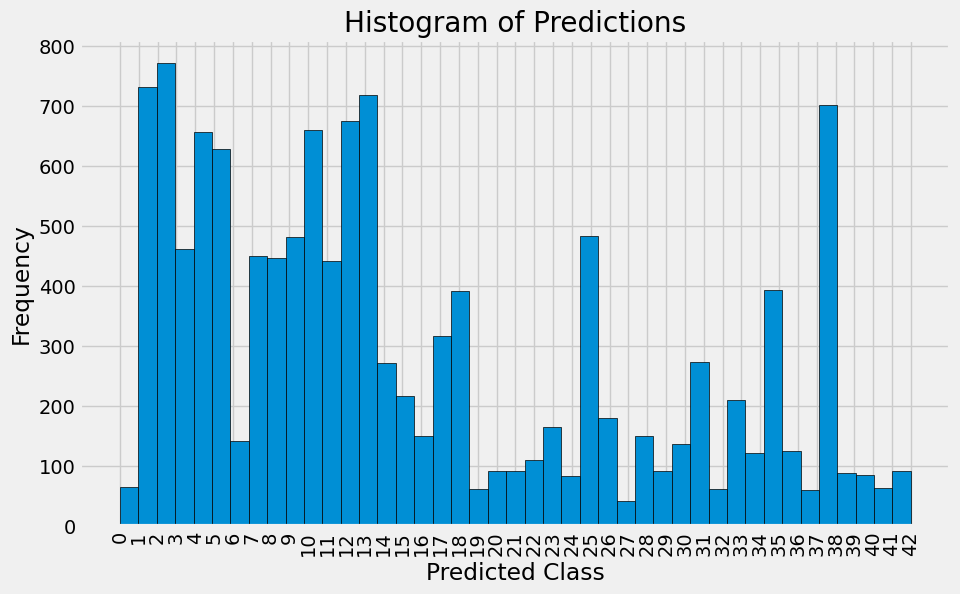

In [55]:
# Visualizing the histogram of predictions
plt.figure(figsize=(10, 6))
plt.hist(pred, bins=len(classes), edgecolor='black')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.title('Histogram of Predictions')
plt.xticks(range(len(classes)), classes, rotation=90)
plt.show()


# FIN